<a href="https://colab.research.google.com/github/pbarizza/ML-course-2025/blob/main/lesson05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 5#
**Machine leaning**

**05-Jul-2025**

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [52]:
df_train = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/test.csv')
df_gender = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/gender_submission.csv')

In [53]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
# Impute missing values for Age, Fare, Embarked
df_train['Age'] = df_train.Age.fillna(df_train.Age.median())
df_train['Fare'] = df_train.Fare.fillna(df_train.Fare.median())
df_train['Embarked'] = df_train['Embarked'].fillna('S')
# encode non numberical data
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)

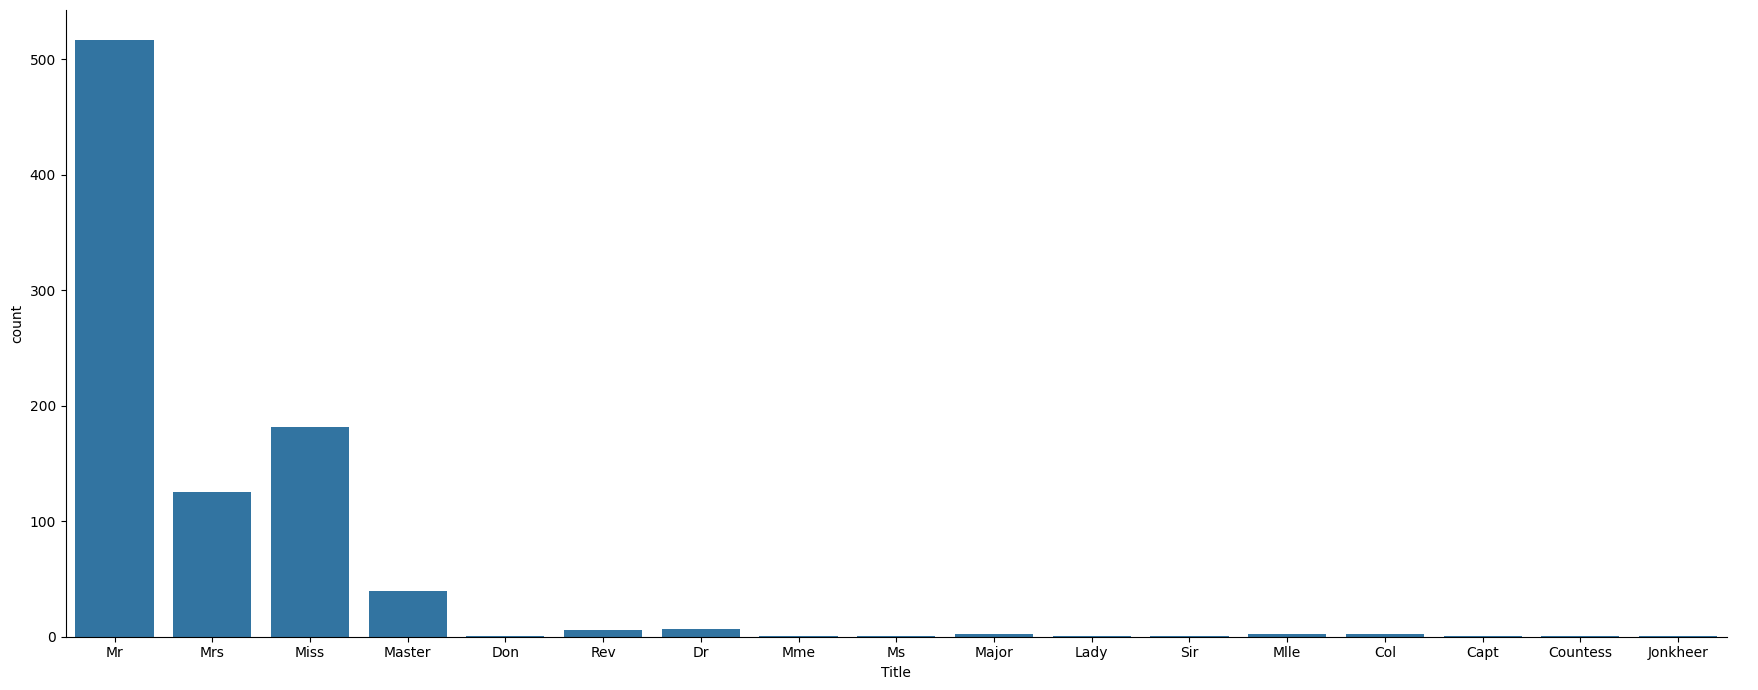

In [55]:
df_train['Name']
df_train['Title']  = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# encode Title with get_dummies
#df_train = pd.get_dummies(df_train, columns=['Title'], drop_first=True)
df_train['Title'].value_counts()
# cat plot title
sns.catplot(x='Title', kind='count', data=df_train, height=7, aspect=2.5)


In [56]:
# replace some of the title with 'rare'
df_train['Title'] = df_train['Title'].replace(['Mlle','Ms'],'Miss')
df_train['Title'] = df_train['Title'].replace(['Mme','Ms'],'Mrs')
df_train['Title'] = df_train['Title'].replace(['Capt','COl','Major','Rev','Jonkheer','Don','Sir','Countess','Lady','Dona'],'Rare')

In [57]:
# family size
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [58]:
df_train['Fare'].head()

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500


In [59]:
# split fare into 4 bins
df_train['FareBin']=pd.qcut(df_train['Fare'],4,labels=False)
df_train['FareBin']

,FareBin
0,0
1,3
2,1
3,3
4,1
...,...
886,1
887,2
888,2
889,2


In [60]:
# groupby by farebin
df_train[['Fare','FareBin']]
df_train.groupby('FareBin')['Fare'].agg(['min','max','mean','median','std'])


,min,max,mean,median,std
FareBin,,,,,
0,0.0000,7.8958,7.034172,7.75000,1.946215
1,7.9250,14.4542,10.386050,9.84375,2.188359
2,14.4583,31.0000,23.028677,25.46670,5.093019
3,31.2750,512.3292,88.677872,69.55000,74.163197


In [77]:
# extract first letter from cabin
df_train['CabinLetter'] = df_train['Cabin'].astype(str).str[0]
df_train[['Cabin','CabinLetter']].head()

,Cabin,CabinLetter
0,NaN,n
1,C85,C
2,NaN,n
3,C123,C
4,NaN,n


In [78]:
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [63]:
# split data
features = ['Pclass','Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = df_train[features]
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
confusion_matrix(y_test, y_pred)






array([[89, 16],
       [20, 54]])

In [66]:
accuracy_score(y_test, y_pred)

0.7988826815642458

In [67]:
precision_score(y_test, y_pred)

0.7714285714285715

In [68]:
recall_score(y_test, y_pred)

0.7297297297297297

In [69]:
f1_score(y_test, y_pred)

0.75

In [70]:
y_test_list = list(y_test)
y_pred_list = list(y_pred)
df_results = X_test.copy()
df_results['y_test'] = y_test_list
df_results['y_pred'] = y_pred_list

TP = TN = FP = FN = 0

for i, row in df_results.iterrows():
    actual = row['y_test']
    pred = row['y_pred']
    if actual == 1 and pred == 1:
        TP += 1
    elif actual == 0 and pred == 0:
        TN += 1
    elif actual == 0 and pred == 1:
        FP += 1
    elif actual == 1 and pred == 0:
        FN += 1

total = TP + TN + FP + FN
accuracy = (TP + TN) / total

y_probs = model.predict_proba(X_test)

y_probs = y_probs[:, 1]

for t in [0.2, 0.4, 0.5, 0.6, 0.8]:
    y_pred_t = (y_probs >= t).astype(int)
    print(f"--- Threshold: {t} ---")
    print(confusion_matrix(y_test, y_pred_t))

--- Threshold: 0.2 ---
[[62 43]
 [ 7 67]]
--- Threshold: 0.4 ---
[[85 20]
 [13 61]]
--- Threshold: 0.5 ---
[[89 16]
 [20 54]]
--- Threshold: 0.6 ---
[[95 10]
 [23 51]]
--- Threshold: 0.8 ---
[[105   0]
 [ 46  28]]


In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
fpr

array([0.        , 0.        , 0.        , 0.02857143, 0.02857143,
       0.02857143, 0.02857143, 0.03809524, 0.03809524, 0.04761905,
       0.04761905, 0.08571429, 0.08571429, 0.12380952, 0.12380952,
       0.14285714, 0.14285714, 0.15238095, 0.15238095, 0.16190476,
       0.16190476, 0.17142857, 0.17142857, 0.19047619, 0.19047619,
       0.2       , 0.2       , 0.20952381, 0.20952381, 0.23809524,
       0.23809524, 0.27619048, 0.27619048, 0.28571429, 0.28571429,
       0.37142857, 0.37142857, 0.46666667, 0.48571429, 0.5047619 ,
       0.5047619 , 0.53333333, 0.53333333, 0.67619048, 0.67619048,
       0.74285714, 0.78095238, 0.82857143, 0.82857143, 0.82857143,
       0.97142857, 0.97142857, 1.        ])

In [72]:
tpr

array([0.        , 0.01351351, 0.48648649, 0.48648649, 0.56756757,
       0.59459459, 0.60810811, 0.60810811, 0.64864865, 0.64864865,
       0.67567568, 0.67567568, 0.68918919, 0.68918919, 0.71621622,
       0.71621622, 0.72972973, 0.72972973, 0.75675676, 0.75675676,
       0.77027027, 0.77027027, 0.78378378, 0.78378378, 0.82432432,
       0.82432432, 0.83783784, 0.83783784, 0.85135135, 0.85135135,
       0.86486486, 0.86486486, 0.87837838, 0.87837838, 0.89189189,
       0.89189189, 0.90540541, 0.90540541, 0.90540541, 0.90540541,
       0.91891892, 0.91891892, 0.93243243, 0.93243243, 0.94594595,
       0.94594595, 0.94594595, 0.94594595, 0.95945946, 0.98648649,
       0.98648649, 1.        , 1.        ])

In [73]:
thresholds

array([       inf, 0.95205576, 0.76384962, 0.72747452, 0.71142255,
       0.71140303, 0.7111944 , 0.69541432, 0.67795043, 0.66687595,
       0.65490877, 0.61211563, 0.60830822, 0.5878335 , 0.56262274,
       0.54209283, 0.52869157, 0.52311591, 0.47073889, 0.46980735,
       0.46509053, 0.4646964 , 0.4563845 , 0.42980809, 0.40472415,
       0.38181033, 0.38092077, 0.37430857, 0.35222135, 0.33933608,
       0.33673987, 0.31418259, 0.31089668, 0.27523502, 0.27263358,
       0.22971052, 0.22433026, 0.1557896 , 0.1556632 , 0.15565627,
       0.15032721, 0.1399069 , 0.13836067, 0.12102339, 0.1178677 ,
       0.10724144, 0.10564917, 0.10275868, 0.1003601 , 0.10031065,
       0.06570679, 0.06556984, 0.04041893])

In [74]:
auc_score = roc_auc_score(y_test, y_probs)
auc_score

np.float64(0.8796653796653796)

In [75]:
# Youden's J = TPR - FPR
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]
print("Best Threshold:", best_threshold)

Best Threshold: 0.352221345906959


Text(0.5, 1.0, 'ROC Curve with Threshold Annotations')

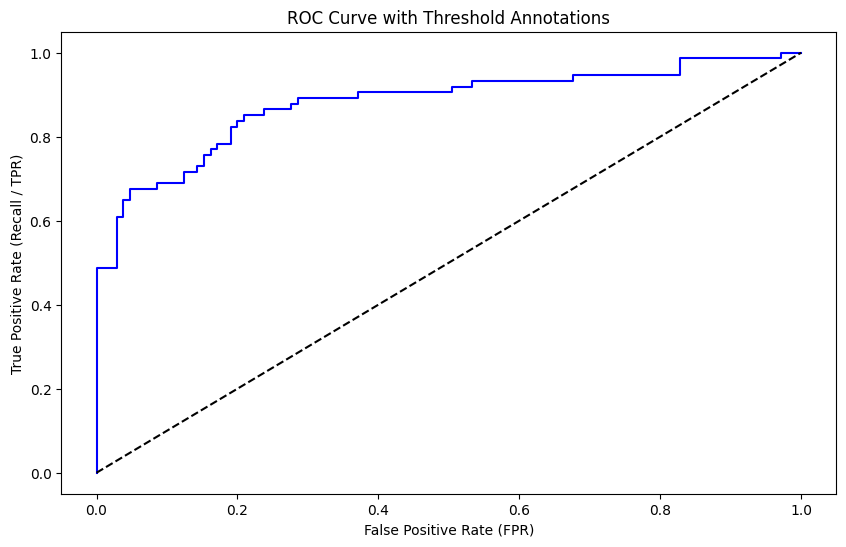

In [76]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (Recall / TPR)')
plt.title('ROC Curve with Threshold Annotations')